## Compare Data Completeness Over Time

**Description**: Analyze the trend of missing data in `"sales_data.csv"` over several months stored in a "date" column. Visualize missing data rates by month.

/tmp/ipykernel_15337/5446624.py:33: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_missing_rate = sales_data_df.resample('M').apply(lambda x: x.isnull().sum() / len(x) * 100)


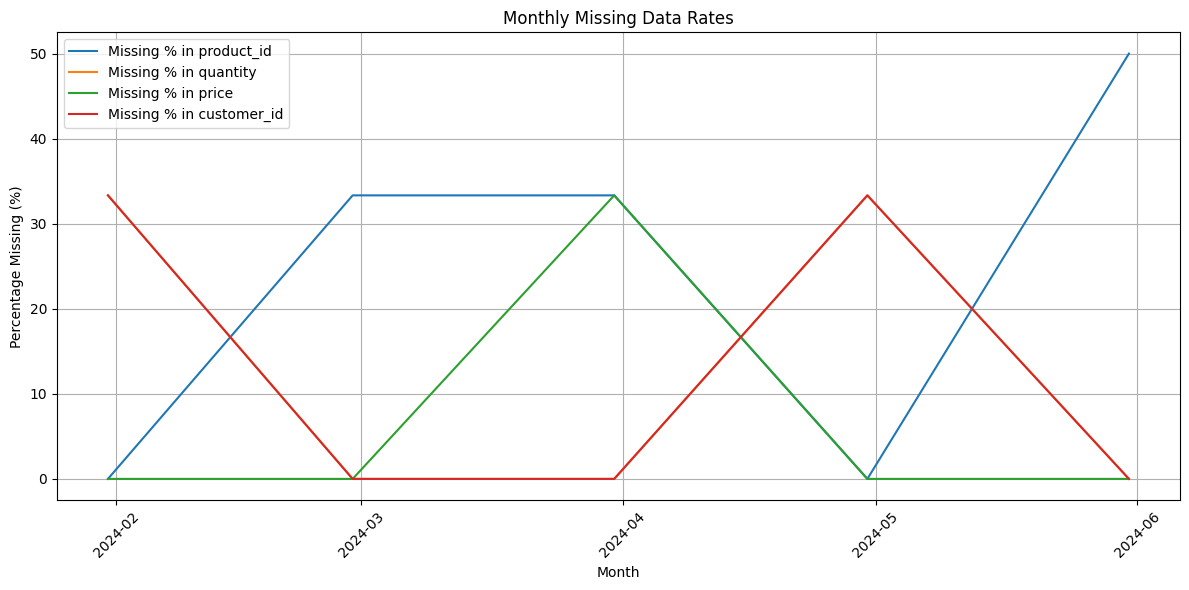


Monthly Missing Data Rates:
            product_id   quantity      price  customer_id
date                                                     
2024-01-31    0.000000  33.333333   0.000000    33.333333
2024-02-29   33.333333   0.000000   0.000000     0.000000
2024-03-31   33.333333   0.000000  33.333333     0.000000
2024-04-30    0.000000  33.333333   0.000000    33.333333
2024-05-31   50.000000   0.000000   0.000000     0.000000


In [1]:
# Write your code from here
import pandas as pd
from io import StringIO
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Sample data for sales_data.csv (replace with your actual file)
sales_data = """date,product_id,quantity,price,customer_id
2024-01-15,P101,2,25.50,C001
2024-01-20,P102,,12.00,C002
2024-01-25,P101,1,25.50,
2024-02-01,P103,3,45.75,C003
2024-02-10,,1,9.99,C001
2024-02-18,P102,2,12.00,C004
2024-03-05,P101,1,,C002
2024-03-12,P104,4,9.99,C005
2024-03-22,,2,25.50,C001
2024-04-01,P102,3,12.00,
2024-04-15,P103,,45.75,C003
2024-04-28,P101,1,25.50,C006
2024-05-10,P104,2,9.99,C002
2024-05-20,,1,12.00,C007
"""
sales_data_df = pd.read_csv(StringIO(sales_data))

# Convert the 'date' column to datetime objects
sales_data_df['date'] = pd.to_datetime(sales_data_df['date'])

# Set 'date' as the index for easier resampling
sales_data_df.set_index('date', inplace=True)

# Resample the data by month and calculate the missing data rate for each column
monthly_missing_rate = sales_data_df.resample('M').apply(lambda x: x.isnull().sum() / len(x) * 100)

# Plot the missing data rates over time
plt.figure(figsize=(12, 6))
for column in monthly_missing_rate.columns:
    plt.plot(monthly_missing_rate.index, monthly_missing_rate[column], label=f'Missing % in {column}')

plt.title('Monthly Missing Data Rates')
plt.xlabel('Month')
plt.ylabel('Percentage Missing (%)')
plt.legend()
plt.grid(True)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("\nMonthly Missing Data Rates:")
print(monthly_missing_rate)